In [14]:
import pandas as pd
import os

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Describe import timeSeriesConvert

In [3]:
wc = timeSeriesConvert.wordCruncher()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mattbrockman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
wc.loadArticles(pubList = ["newyorktimes", "foxnews", "washingtonpost", "cnn", "breitbart", "abcnews", "dailycaller"])


In [6]:
wc.buildBigDF()

In [7]:
df = wc.bigdf
mySources = ["cnn", "foxnews"]
df = df[df.source.isin(mySources)]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [9]:
vectorizer = CountVectorizer(stop_words = "english", ngram_range=(1,3))

In [10]:
df.quickReplace

0        ari fleischer spacex launch american have miss...
1        zuckerberg twitter fact check trump privat com...
2         trump twitter judg nap explain silenc user legal
3        devin nune fisa reform conspiraci lie leak ple...
4        lsu tiger head coach say safeti number one pri...
                               ...                        
64737              our favorit father day gift for any dad
64738                        the best true wireless earbud
64739                            the cutest swimsuit under
64740        from stylish silli face mask for everi person
64741         attent runner adida having sale just for you
Name: quickReplace, Length: 111747, dtype: object

In [11]:
vectorizer.fit(df.quickReplace)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

20200519-2200
cnn
foxnews


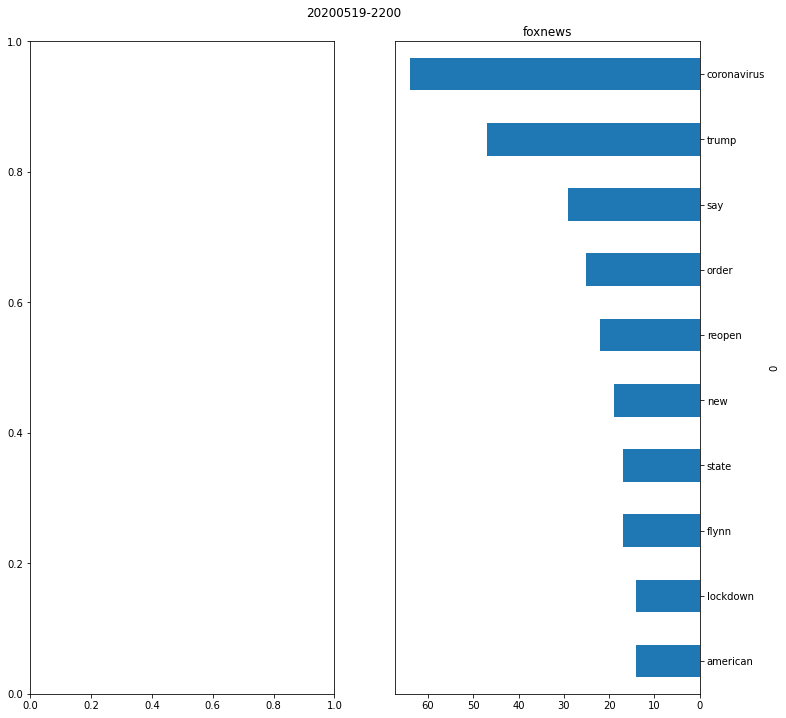

In [55]:
targetDates = sorted(df.date.unique())
windowSize = 5
out_dir="wordCloudImages"
os.makedirs(out_dir, exist_ok=True)

for dateIdx in range(len(targetDates)-windowSize):
    print(targetDates[dateIdx+windowSize])
    tmp = df[df.date.isin(targetDates[dateIdx:dateIdx+windowSize])].copy()
    tmp["count"] = vectorizer.transform(tmp.quickReplace)
    
    fig, axs = plt.subplots(nrows =1, ncols=2, figsize=(12,12))
    
    for srcIdx in range(2): # go through each of the publications, just doing 2 for now
        mySource = mySources[srcIdx]
        print(mySource)
        myWords = tmp[tmp.source==mySource]
        
        if len(myWords) < 1: #skip if there aren't any words to plot
            continue
            
        myWords = vectorizer.transform(myWords.quickReplace)

        wordCounts = myWords.sum(axis=0)
        labels = [(word, wordCounts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

        test = pd.DataFrame(labels)
        test[test[1] > 0].set_index(0).sort_values(by=1)[-10:]\
            .plot.barh(legend=False, ax=axs[srcIdx], title="{}".format(mySource))
        if srcIdx%2 ==1:
            axs[srcIdx].invert_xaxis()
            axs[srcIdx].yaxis.set_label_position("right")
            axs[srcIdx].yaxis.tick_right()

    
    fig.suptitle(targetDates[dateIdx+windowSize], y=.92)
    fig.savefig("{}/{}.jpg".format(out_dir, dateIdx), bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    plt.close()
    break

In [39]:
import Visualize.buildAnimations as ba

[autoreload of Describe.timeSeriesConvert failed: Traceback (most recent call last):
  File "/Library/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Library/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/Library/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/Library/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/Library/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/Library/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visite

In [40]:
tmp = ba.animator()

In [41]:
tmp.visualizeTimePeriod(vid_name="bars.gif", frameSpeed=.25)

wordCloudImages/0.jpg
wordCloudImages/1.jpg
wordCloudImages/2.jpg
wordCloudImages/3.jpg
wordCloudImages/4.jpg
wordCloudImages/5.jpg
wordCloudImages/6.jpg
wordCloudImages/7.jpg
wordCloudImages/8.jpg
wordCloudImages/9.jpg
wordCloudImages/10.jpg
wordCloudImages/11.jpg
wordCloudImages/12.jpg
wordCloudImages/13.jpg
wordCloudImages/14.jpg
wordCloudImages/15.jpg
wordCloudImages/16.jpg
wordCloudImages/17.jpg
wordCloudImages/18.jpg
wordCloudImages/19.jpg
wordCloudImages/20.jpg
wordCloudImages/21.jpg
wordCloudImages/22.jpg
wordCloudImages/23.jpg
wordCloudImages/24.jpg
wordCloudImages/25.jpg
wordCloudImages/26.jpg
wordCloudImages/27.jpg
wordCloudImages/28.jpg
wordCloudImages/29.jpg
wordCloudImages/30.jpg
wordCloudImages/31.jpg
wordCloudImages/32.jpg
wordCloudImages/33.jpg
wordCloudImages/34.jpg
wordCloudImages/35.jpg
wordCloudImages/36.jpg
wordCloudImages/37.jpg
wordCloudImages/38.jpg
wordCloudImages/39.jpg
wordCloudImages/40.jpg
wordCloudImages/41.jpg
wordCloudImages/42.jpg
wordCloudImages/43.jp

wordCloudImages/348.jpg
wordCloudImages/349.jpg
wordCloudImages/350.jpg
wordCloudImages/351.jpg
wordCloudImages/352.jpg
wordCloudImages/353.jpg
wordCloudImages/354.jpg
wordCloudImages/355.jpg
wordCloudImages/356.jpg
wordCloudImages/357.jpg
wordCloudImages/358.jpg
wordCloudImages/359.jpg
wordCloudImages/360.jpg
wordCloudImages/361.jpg
wordCloudImages/362.jpg
wordCloudImages/363.jpg
wordCloudImages/364.jpg
wordCloudImages/365.jpg
wordCloudImages/366.jpg
wordCloudImages/367.jpg
wordCloudImages/368.jpg
wordCloudImages/369.jpg
wordCloudImages/370.jpg
wordCloudImages/371.jpg
wordCloudImages/372.jpg
wordCloudImages/373.jpg
wordCloudImages/374.jpg
wordCloudImages/375.jpg
wordCloudImages/376.jpg
wordCloudImages/377.jpg
wordCloudImages/378.jpg
wordCloudImages/379.jpg
wordCloudImages/380.jpg
wordCloudImages/381.jpg
wordCloudImages/382.jpg
wordCloudImages/383.jpg
wordCloudImages/384.jpg
wordCloudImages/385.jpg
wordCloudImages/386.jpg
wordCloudImages/387.jpg
wordCloudImages/388.jpg
wordCloudImages/

In [19]:
testing=[1,2,3]

In [20]:
testing[-10:]

[1, 2, 3]

In [55]:
wordCounts = myWords.sum(axis=0)


In [96]:
words_freq = [(word, wordCounts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

In [97]:
words_freq

[('ari', 0),
 ('fleischer', 0),
 ('spacex', 0),
 ('launch', 0),
 ('american', 0),
 ('miss', 0),
 ('moment', 0),
 ('ari fleischer', 0),
 ('fleischer spacex', 0),
 ('spacex launch', 0),
 ('launch american', 0),
 ('american miss', 0),
 ('miss moment', 0),
 ('ari fleischer spacex', 0),
 ('fleischer spacex launch', 0),
 ('spacex launch american', 0),
 ('launch american miss', 0),
 ('american miss moment', 0),
 ('zuckerberg', 0),
 ('twitter', 0),
 ('fact', 0),
 ('check', 0),
 ('trump', 0),
 ('privat', 0),
 ('compani', 0),
 ('shouldn', 0),
 ('arbit', 0),
 ('truth', 0),
 ('zuckerberg twitter', 0),
 ('twitter fact', 0),
 ('fact check', 0),
 ('check trump', 0),
 ('trump privat', 0),
 ('privat compani', 0),
 ('compani shouldn', 0),
 ('shouldn arbit', 0),
 ('arbit truth', 0),
 ('zuckerberg twitter fact', 0),
 ('twitter fact check', 0),
 ('fact check trump', 0),
 ('check trump privat', 0),
 ('trump privat compani', 0),
 ('privat compani shouldn', 0),
 ('compani shouldn arbit', 0),
 ('shouldn arbit 

In [100]:
import pandas as pd
test = pd.DataFrame(words_freq)

In [117]:
.sort_values(by=).plot.barh()

SyntaxError: invalid syntax (<ipython-input-117-6435df7627b5>, line 1)

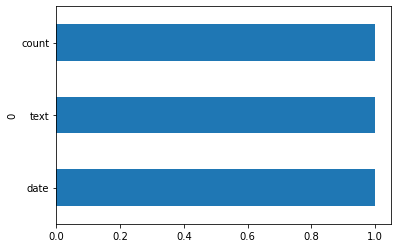

In [76]:
wordCounts

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [78]:
wordCounts.argmax()

14169

In [82]:
i,j = np.unravel_index(wordCounts.argmax(), wordCounts.shape)

In [83]:
i

0

In [84]:
j

14169

In [70]:
wordCounts[0]

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
import numpy as np

In [88]:
(-wordCounts).argsort()[:10]


matrix([[62307, 15855, 14169, ..., 23634, 23640, 70913]])

In [92]:
wordCounts[0,14169]

1